# Segment Tree #  
구간합을 빠르게 구하기 위한 자료구조(값 수정 가능)


### 초기화

In [1]:
array = [1, 2, 3, 4, 5, 6, 7]
N = len(array)
over_n_pow_of_two = 1
while over_n_pow_of_two < N:
    over_n_pow_of_two <<= 1
segment_tree = [0] * (over_n_pow_of_two << 1)

### 트리 출력하기

In [2]:
import graphviz

def print_tree(tree:list):
    N = len(tree)
    d = graphviz.Graph()
    for i in range(1, N):
        d.node(str(i), str(tree[i]))
    for i in range(1, N>>1):
        d.edge(str(i), str(i<<1))
        d.edge(str(i), str((i<<1)+1))
    display(d)

### 트리 만들기

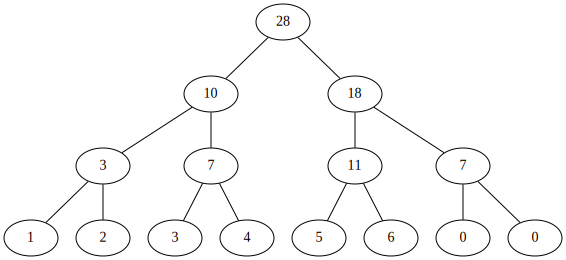

In [4]:
def build(start, end, tree_index):
    if start == end:
        segment_tree[tree_index] = array[start]
        return
    
    mid = (start+end)//2
    build(start, mid, tree_index*2)
    build(mid+1, end, tree_index*2 +1)
    segment_tree[tree_index] = segment_tree[tree_index*2] + segment_tree[tree_index*2 +1]

build(0, N-1, 1)
# print(segment_tree)
print_tree(segment_tree)

### 구간합 구하기

In [5]:
def prefix_sum(tree_index, query_start, query_end, target_start, target_end):
    '''
    구간합 구하기
        Args:
            tree_index(int)
                query_start ~ query index까지의\n
                부분합을 담고 있는 segment_tree의 index\n
                초기값은 1
            query_start(int): 
                현재 쿼리 요청중인 구간 (시작)\n
                초기값은 0
            query_end(int): 
                현재 쿼리 요청중인 구간 (끝)\n
                초기값은 len(array)-1
            target_start(int):
                구하고자 하는 구간합 구간 (시작)
            target_end(int):
                구하고자 하는 구간합 구간 (끝)\n
                마지막 인덱스까지 구간합 구간에 포함
    '''
    if query_start > target_end or query_end < target_start: # 쿼리 구간이 목표 구간에 포함되지 않았을 떄
        return 0
    
    if target_start <= query_start and query_end <= target_end: # 쿼리 구간이 목표 구간에 완전히 포함될 때
        return segment_tree[tree_index]

    mid = (query_start+query_end)//2 # 쿼리 구간이 목표 구간과 일부만 겹칠 때
    return  prefix_sum(tree_index*2, query_start, mid, target_start, target_end) + prefix_sum(tree_index*2+1, mid+1, query_end, target_start, target_end)

prefix_sum(1, 0, N-1, 0, N-1)

28

### 값 업데이트

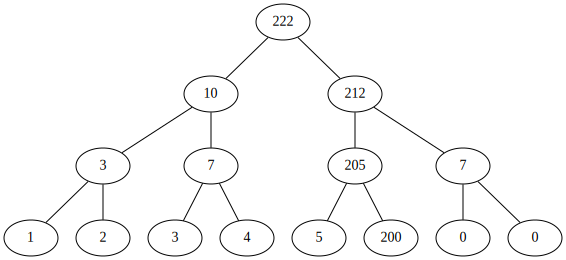

In [6]:
def update(tree_index, query_start, query_end, array_index, value):
    if query_start == query_end: # 쿼리 구간이 array_index와 일치
        diff = value - segment_tree[tree_index]
        segment_tree[tree_index] = value
        return diff
    
    mid = (query_start+query_end)//2

    if query_start <= array_index <= query_end: # 쿼리 구간이 array_index를 포함하는 경우 원래값과 변경된 값의 차이만큼 더해주기
        if mid >= array_index: # array_index가 트리의 왼쪽 구간에 속하는 경우
            diff = update(tree_index*2, query_start, mid, array_index, value)
        else: # array_index가 트리의 오른쪽 구간에 속하는 경우
            diff = update(tree_index*2+1, mid+1, query_end, array_index, value)
        segment_tree[tree_index] += diff
        return diff

update(1, 0, N-1, 5, 200)
print_tree(segment_tree)

## 반복문 구현  
#### 그냥 2배 사용해도 이상은 없지만 array index 역추적을 위해서는 N값이 2의 제곱승이여야 한다

### 초기화

In [7]:
array = [1, 2, 3, 4, 5, 6, 7]
N = len(array)
segment_tree = [0] * (N << 1)

### 트리 만들기

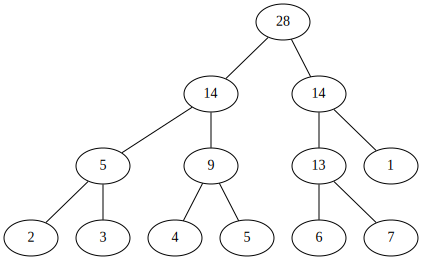

In [8]:
def build():
    for i in range(N):
        segment_tree[N+i] = array[i]
    for i in range(N-1, 0, -1):
        segment_tree[i] = segment_tree[i*2] + segment_tree[i*2+1]
build()
# print(segment_tree)
print_tree(segment_tree)

### 구간합 구하기

In [9]:
def prefix_sum(left, right):
    left += N
    right += N

    ret = 0
    while left <= right:
        if left % 2 == 1:
            ret += segment_tree[left]
            left += 1
        if right % 2 == 0:
            ret += segment_tree[right]
            right -= 1
        left //= 2
        right //= 2
    return ret

prefix_sum(0, 6)

28

### 값 업데이트

In [10]:
def update(idx, val):
    idx = N+idx
    segment_tree[idx] = val
    idx //= 2
    while idx:
        segment_tree[idx] = segment_tree[idx*2] + segment_tree[idx*2+1]
        idx //= 2